#Versuch 5 GP 1 Robin Hoffmann

In Versuch 5 geht es um selbstgebaute elektrische Schaltungen in Verbindung mit dem Ohmschen Gesetz und den Kirchoffschen Regeln

##1. Kalibrierung der Spannungsquellen

Zu Beginn müssen die Spannungsquellen des IOLab-Gerät und die der drei AAA-Batterien kalibriert werden, hierzu wird überprüft ob die abgegebene Spannung mit den Angaben übereinstimmen.

###1.1 Versuchsaufbau

Zuerst wird die Spannung $U_{IOLab}$ des IOLab-Geräts überprüft. Hierzu werden zwei 10kΩ Widerstände als Spannungsteiler in Reihe geschalten. Wird als Spannungsmessgerät V der A7 Sensor des IOLab-Geräts, wie in Schaltplan 1 verbunden, lässt sich die halbe Spannung des IOLab-Geräts messen. Die Spannung $U_{Batterie}$ der drei AAA-Batterien kann dann analog wie die des IOLab-Geräts gemessen werden. 

###1.2 Datenauswertung

Die Ausgangsspannung $U_{IOLab}$ der Spannungsquelle des IOLab-Geräts lässt sich anhand der Spannung $U_1$ und der Kirchhoffschen Regel berechnen mit:

$U_1 = (1,647±0,003)V$

$U_{IOLab} = (\frac{R_1}{R_2} + 1) * U_1 = (3.294±0.006)V$

Die Ausgangsspannung $U_{Batterie}$ der drei AAA-Baterien in Reihenschaltung lässt sich anhand der Spannung $U_2$ und dem Ohmschengesetz berechnet mit:

$U_2 = (2,407±0,004)V$

$U_{Batterie} = (\frac{R_1}{R_2} + 1) * U_2 = (4.814±0.008)V$

Die Unsicherheiten der Spannungen werden hierbei über die Fehlerfortpflanzung berechnet.

Es lässt sich erkennen, dass die realen Spannungen der Spannungsquellen von den Angaben abweichen. Vorallemn bei den drei AAA-Batterien lässt sich ein großer Unterschied erkennen, der auch nicht mehr in der experimentellen Unsicherheit liegt.

In [38]:
#!pip install uncertainties
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
import statistics
import math
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from google.colab import files
from IPython.display import Image

In [39]:
u1 = ufloat(1.647, 0.003)
u2 = ufloat(2.407, 0.004)
r1 = ufloat(10000, 100)
r2 = ufloat(4700, 47)
r3 = ufloat(1, 0.05)
uio = (r1/r1 +1) * u1
u3a = (r1/r1 +1) * u2
#print('uio:', uio)
#print('u3a:', u3a)
i10 = uio/r1
#print('i10:', i10)
i47 = uio/r2
#print('i47:', i47)
gp1 = ufloat(0.2297, 0.0006)
gm1 = ufloat(0.4, 0.0006)
gp2 = ufloat(0.5751, 0.0004)
gm2 = ufloat(0.8, 0.0006)
u3 = (gp1 + gm1)/2
#print('u3:', u3)
u4 = (gp2 + gm2)/2
#print('u4:', u4)
ie10 =  u3/r3
#print('ie10:', ie10)
ie47 =  u4/r3
#print('ie47:', ie47)

##2. Überprüfung des Ohmschen Gesetz

In folgendem Experiment soll das Ohmsche Gesetz überprüft werden, indem theoretische Werte mit experimentellen Werten verglichen werden.

###2.1 Versuchsaufbau

Die Spannungsquelle des IOLab-Geräts wird nun an einen Stromkreis mit jeweils einem 4,7kΩ und 10kΩ Widerstand angeschlossen. Es soll nun überprüft werden ob sich ein Spannungsabfall vermerken lässt, wie es das Ohmsche Gesetz für Strom der durch einen Widerstand fließt vorhersagt. Hierzu wird die Spannung an einem in Reihe geschalteten Shunt-Widerstand $R_{Shunt}$ mit 1Ω durch den High-Gain-Sensor des IOLab-Geräts gemessen (siehe Schaltplan 2). Der Shunt-Widerstand kann hierbei vernachlässigt werden, da er $10^3$ Größenordnungen kleiner ist als die anderen Widerstände im Stromkreis. 

###2.2 Datenauswertung
Zuerst soll der Strom anhand bekannter Zusammenhänge berechnet werden, hierbei ergibt sich aus dem Ohmschen Gesetz und der Fehlerfortpflanzung:

$I_{10kΩ} = \frac{U_{IOLab}}{R_2}$

$I_{4,7kΩ} = \frac{U_{IOLab}}{R_1}$

Der Strom kann nun durch die experimentellen Werte der Spannungen $U_3$ und $U_4$ erneut ausgerechnet werden, diese werden jeweils aus dem Durchschnitt des Betrags von $G_+$ und $G_-$ berechnet:

$U_3 = (0,3149±0,0004)mV$

$I_{exp10kΩ} = \frac{U_3}{R_{Shunt}}$

$U_4 = (0,6875±0,0004)mV$

$I_{exp4,7kΩ} = \frac{U_4}{R_{Shunt}}$

$$
\begin{aligned}
& \text {Tabelle 2.1. Vergleich zur Überprüfung des Ohmschen Gesetz }\\
&\begin{array}{cccc}
\hline \hline \text { Größe } & \text { Experimenteller Wert } & \text { Berechneter Wert } & \text { Einheit } \\
\hline 
I_{10kΩ} & 0,315±0.016 & 0,329±0,003 & mA \\
I_{4,7kΩ} & 0.69±0.03 & 0,701±0,007 & mA \\
\hline
\end{array}
\end{aligned} 
$$

Es lässt sich erkennen, dass die Werte in der experimentellen Unsicherheit des Versuchs liegen, was als Bestätigung für das Ohmsche Gesetz gesehen werden kann.


##3. Widerstandsnetzwerk mit einer Spannungsquelle

###3.1 Versuchsaufbau

Es wird eine Stromkreis mit mehreren Widerständen, wie in Schaltplan 3 dargestellt, aufgebaut. Nun soll anhand des Ohmschen Gesetz und der Kirchoffschen Regeln die Ströme an den Punkten A1, A2 und A3, sowie die  Spannungen, die an den vier Widerständen abfallen ermittelt werden. Hierzu sollen die Größen zuerst anhand der bekannten Gesetz berechnet werden und dann wiederum durch Messung mit dem High-Gain-Sensor des IOLab-Geräts, die Spannungen $U_{1,2,3}$ an einem Shunt-Widerstand bestimmt werden.  

###3.2 Datenauswertung

Nach dem Ohmschem Gesetz und der Kirchoﬀscher Regel folgt:

$R_{Ges} = R_1 + \frac{R_2 * (R_3 + R_4)}{R_2 + R_3 + R_4} = (10650±80)Ω$

$I_1 = \frac{U_{IOLab}}{R_{Ges}}$

$I_2 = \frac{U_{IOLab} - R_1 * I_1}{R_2}$

$I_3 = \frac{R_2 * I_2}{R_3 + R_4}$

$U_{i} = R_i * I_i$ mit $iϵ(1,2,3,4)$ und $(I_3 = I_4)$

Die berechnung der experimentelle Werte der Ströme ergibt sich aus:

$I_1 = \frac{U_{1}}{R_{Shunt}}$

$I_2 = \frac{U_{2}}{R_{Shunt}}$

$I_3 = \frac{U_{3}}{R_{Shunt}}$

Die Spannungen der experimentellen Werte ergeben sich analog aus den Formeln für $U_{i}$, wie bei der theoretischen Berechnung.


In [40]:
r1 = ufloat(4700, 47)
r2 = ufloat(10000, 100)
r3 = ufloat(1, 0.05)
rg = r1 + (r2*(r1+r2))/(r2+r1+r2)
#print('rges: ', rg)
i1 = (uio)/(rg)
#print('i1: ', i1)
i2 = (uio-r1*i1)/r2
#print('i2: ', i2)
i3 = (r2*i2)/(r1+r2)
#print('i3: ', i3)
u1 = r1 * i1
#print('u1: ', u1)
u2 = r2 * i2
#print('u2: ', u2)
u3 = r1 * i3
#print('u3: ', u3)
u4 = r2 * i3
#print('u4: ', u4)

gp1 = ufloat(0.0001991, 0.00000022)
gm1 = ufloat(0.00038851, 0.0000021)
i1e = (gp1+gm1)/2*r3
#print('i1e: ', i1e)

gp2 = ufloat(0.0001526, 0.00000082)
gm2 = ufloat(0.00018805, 0.00000077)
i2e = (gp2+gm2)/2*r3
#print('i2e: ', i2e)

gp3 = ufloat(0.00010101, 0.00000071)
gm3 = ufloat(0.00013296, 0.00000061)
i3e = (gp3+gm3)/2*r3
#print('i3e: ', i3e)

u1e = r1 * i1e
#print('u1e: ', u1e)
u2e = r2 * i2e
#print('u2e: ', u2e)
u3e = r1 * i3e
#print('u3e: ', u3e)
u4e = r2 * i3e
#print('u4e: ', u4e)


$$
\begin{aligned}
& \text {Tabelle 3.1. Vergleich der experimentellen und theoretischen Werte }\\
&\begin{array}{cccc}
\hline \hline \text { Größe } & \text { Experimenteller Wert } & \text { Berechneter Wert } & \text { Einheit } \\
\hline I_1 & 0,294±0,015 & 0,309±0,002 & mA \\
I_2 & 0,170±0,009 & 0,1841±0,0014 & mA \\
I_3 & 0,117±0,006 & 0,1252±0,0010 & mA \\
U_{R1} & 1,38±0,07 & 1,453±0,010 & V \\
U_{R1} & 1,70±0,09 & 1,841±0,011 & V \\
U_{R1} & 0,55±0,03 & 0,589±0,003 & V \\
U_{R1} & 1,17±0,06 & 1,252±0,013 & V \\
\hline
\end{array}
\end{aligned} 
$$

Es lässt sich erkennen, dass die Werte sehr ähnlich sind jedoch nicht in der experimentellen Unsicherheit liegen. Die Kirchhoffsche Regel lässt sich hierdurch trotzdem bestätigen, vielmehr lässt sich hier auf eine zusätzliche Unsicherheit durch Wärme der Kontakte und Ungenauigkeit des Sensors schließen.

##4. Widerstandsnetzwerk mit zwei Spannungsquellen

###4.1 Versuchsaufbau

Es wird eine Stromkreis mit mehreren Widerständen und mehreren Spannungsquellen, wie in Schaltplan 4 dargestellt, aufgebaut. Nun sollen wieder der Strom an den Punkten A1, A2 und A3 theoretisch berechnet und dann durch Messung verglichen werden. Hierzu wird wieder mit dem High-Gain-Sensor an einem Shunt-Widerstand die Spannungen für die Punkte gemessen.

###4.2 Datenauswertung

Nach dem Ohmschem Gesetz und der Kirchoﬀscher Regel ergibt sich für diesen Stromkreis:

$I_2 = I_1 + I_3$

$U_{Batterie} = R_3 * I_3 + R_2 * I_2$

$U_{IOLab} = R_1 * I_1 + R_2 * I_2$

daraus folgt für den Strom an den einzelnen Punkten:

$I_1 = \frac{U_{IOLab} * (R_2 + R_3) - R_2 * U_{Batterie}}{R_1 * (R_2 + R_3) + R_2 * R_3}$

$I_2 = I_1 + I_3$

$I_3 = \frac{U_{Batterie} - R_2 * I_1}{R_2 + R_3}$

Die berechnung der experimentelle Werte der Ströme ergibt sich aus:

$I_1 = \frac{U_{1}}{R_{Shunt}}$

$I_2 = \frac{U_{2}}{R_{Shunt}}$

$I_3 = \frac{U_{3}}{R_{Shunt}}$

In [41]:
r1 = ufloat(4700, 47)
r2 = ufloat(10000, 100)
r3 = ufloat(1, 0.05)

i1 = (uio*(r1+r2)-r1*u3a)/(r1*(r1+r2)+r1*r2)
#print('i1: ', i1)
i3 = (u3a-r1*i1)/(r1+r2)
#print('i3: ', i3)
i2 = i1+i3
#print('i2: ', i2)

gp11 = ufloat(0.00011946, 0.0000011)
gp12 = ufloat(0.00012017, 0.0000011)
gp13 = ufloat(0.00012176, 0.0000051)
gm11 = ufloat(0.00030431, 0.00000056)
gm12 = ufloat(0.00029255, 0.0000013)
gm13 = ufloat(0.00029107, 0.0000011)

gp21 = ufloat(0.00038271, 0.000002)
gp22 = ufloat(0.00037831, 0.0000011)
gp23 = ufloat(0.00037568, 0.0000004)
gm21 = ufloat(0.00052592, 0.0000022)
gm22 = ufloat(0.00054209, 0.00000021)
gm23 = ufloat(0.00055218, 0.00000078)

gp31 = ufloat(0.00014143, 0.0000021)
gp32 = ufloat(0.00013778, 0.0000019)
gp33 = ufloat(0.00014331, 0.0000011)
gm31 = ufloat(0.00032644, 0.00000021)
gm32 = ufloat(0.00031962, 0.000001)
gm33 = ufloat(0.00032537, 0.0000003)

u1 = (gp11+gp12+gp13+gm11+gm12+gm13)/6
i1e = u1/r3
#print('i1e: ', i1e)

u2 = (gp21+gp22+gp23+gm21+gm22+gm23)/6
i2e = u2/r3
#print('i2e: ', i2e)

u3 = (gp31+gp32+gp33+gm31+gm32+gm33)/6
i3e = u3/r3
#print('i3e: ', i3e)


$$
\begin{aligned}
& \text {Tabelle 4.1. Vergleich der experimentellen und theoretischen Werte }\\
&\begin{array}{cccc}
\hline \hline \text { Größe } & \text { Experimenteller Wert } & \text { Berechneter Wert } & \text { Einheit } \\
\hline 
I_1 & 0,208±0,010 & 0,222±0,004 & mA \\
I_2 & 0,46±0,02 & 0,479±0,004 & mA \\
I_3 & 0,232±0,012 & 0,256±0,002 & mA \\
\hline
\end{array}
\end{aligned} 
$$

Es lässt sich erkennen, dass die Werte sehr ähnlich sind jedoch zum Teil nicht in der experimentellen Unsicherheit liegen. Dies ergibt sich aus den in Aufgabe 3 beschriebenen Faktoren die zusätzlich eine Auswirkung auf die bestimmten Größen haben kann.

##5.1 Schaltpläne

###Schaltplan 1

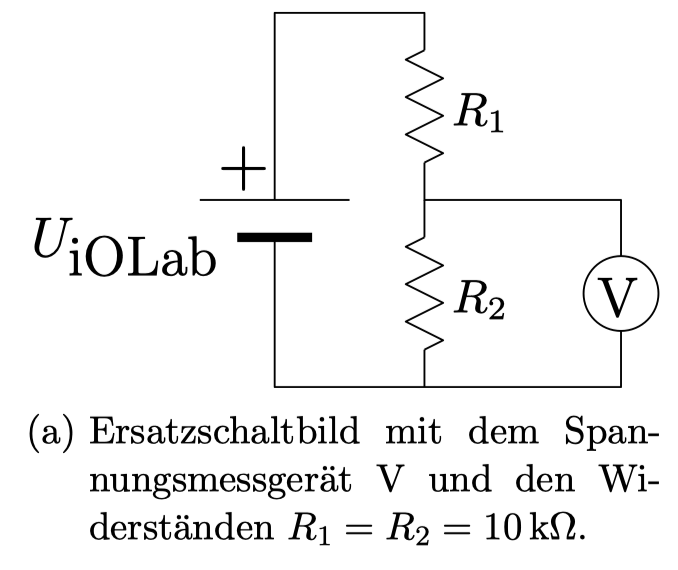

In [59]:
#uploaded = files.upload()
Image('SP1.png', width = 200)

###Schaltplan 2

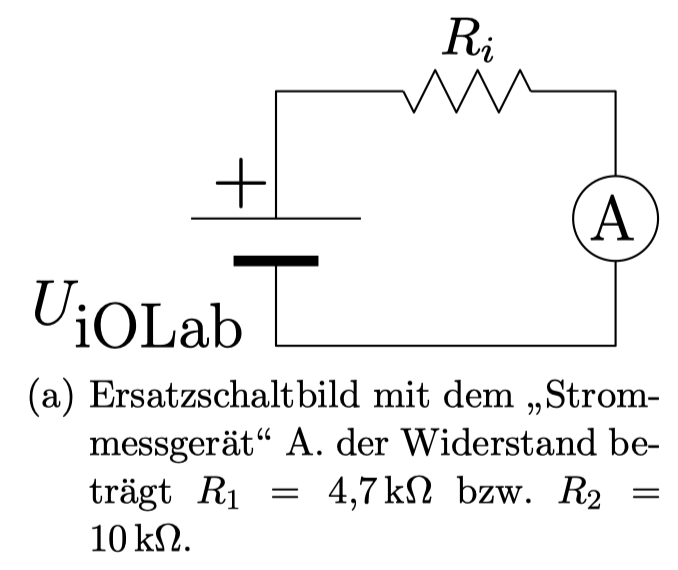

In [60]:
#uploaded = files.upload()
Image('SP2.png', width = 200)

###Schaltplan 3

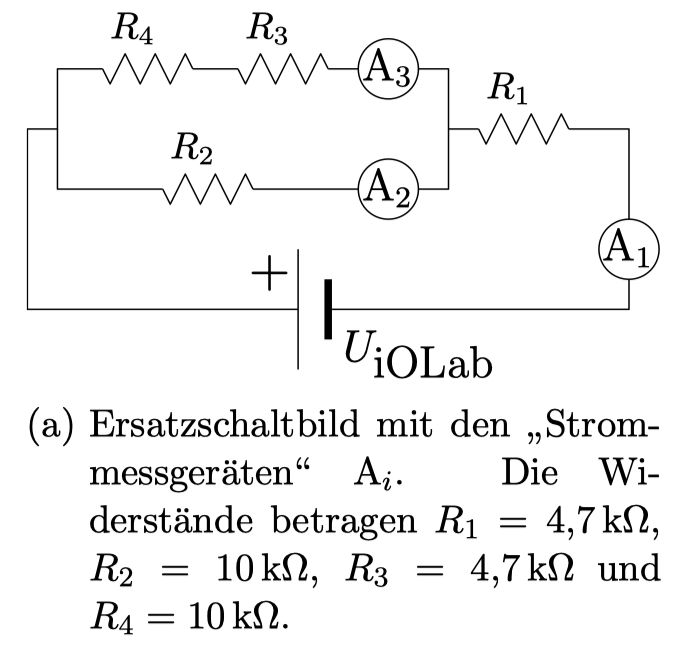

In [61]:
#uploaded = files.upload()
Image('SP3.png', width = 225)

###Schaltplan 4

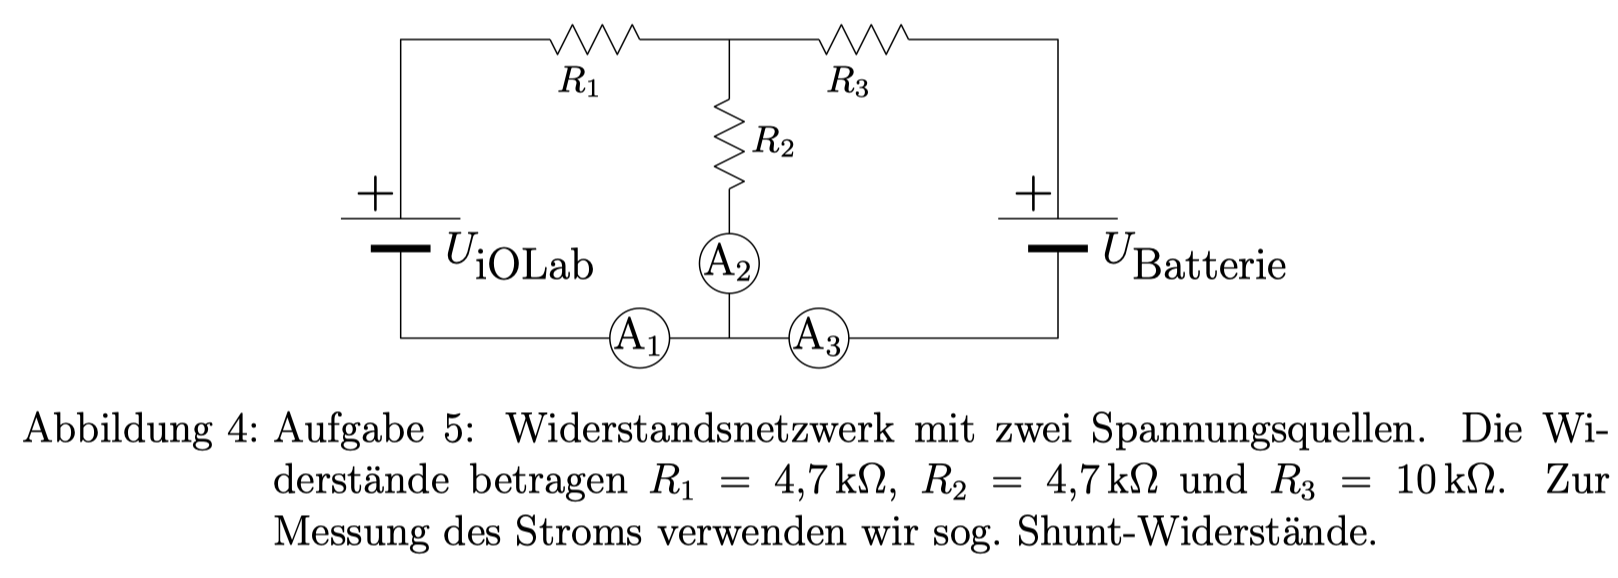

In [62]:
#uploaded = files.upload()
Image('SP4 (1).png', width = 500)